### Comparison based on the Test data

In [168]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

In [169]:
# Load the dataset
df = pd.read_csv(r"D:\Materials\Academic\Semester 8\AI and ML\Coding\Datasets\Deformation ML File.csv")

In [170]:
df.head()

,stiffener_height_mm,plate_thickness_mm,stiffener_thickess_mm,pressure_mm,deformation_mm,mass_kg
0,40.6875,2.389063,1.895312,0.050469,3.748899,2.403142
1,45.6875,2.173437,1.904688,0.098281,9.382610,2.252441
2,35.1875,2.454687,2.129688,0.061406,4.329086,2.452294
3,43.4375,3.073437,1.979688,0.058281,2.137503,3.039688
4,35.8125,3.251562,1.154688,0.053281,2.034908,3.021081


In [171]:
# Size of the dataset
df.shape

(149, 6)

In [172]:
# Assigning X as Input and Y as Output
X=df.drop('deformation_mm', axis=1)
Y=df['deformation_mm']

In [173]:
# Output Visualization
Y.head()

0    3.748899
1    9.382610
2    4.329086
3    2.137503
4    2.034908
Name: deformation_mm, dtype: float64

In [174]:
# Input Visualization
X.head()

,stiffener_height_mm,plate_thickness_mm,stiffener_thickess_mm,pressure_mm,mass_kg
0,40.6875,2.389063,1.895312,0.050469,2.403142
1,45.6875,2.173437,1.904688,0.098281,2.252441
2,35.1875,2.454687,2.129688,0.061406,2.452294
3,43.4375,3.073437,1.979688,0.058281,3.039688
4,35.8125,3.251562,1.154688,0.053281,3.021081


In [175]:
# Spliting the dataset into train and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,random_state=42)

### Apply Linear Regression

In [177]:
model=LinearRegression()
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [178]:
test_predictions= model.predict(X_test)
test_matrics= {
    'Model': 'Linear Regression',
    'MSE': mean_squared_error(Y_test, test_predictions),
    'MAE': mean_absolute_error(Y_test, test_predictions),
    'R2': r2_score(Y_test, test_predictions),
    'MAPE': mean_absolute_percentage_error(Y_test, test_predictions)
}

print(test_matrics)

{'Model': 'Linear Regression', 'MSE': 0.2258508194476462, 'MAE': 0.38246627104187486, 'R2': 0.9397435103949736, 'MAPE': 0.09045971164290627}


In [179]:
# creating an empty list to store the result
results =[]
results.append(test_matrics)

results

[{'Model': 'Linear Regression',
  'MSE': 0.2258508194476462,
  'MAE': 0.38246627104187486,
  'R2': 0.9397435103949736,
  'MAPE': 0.09045971164290627}]

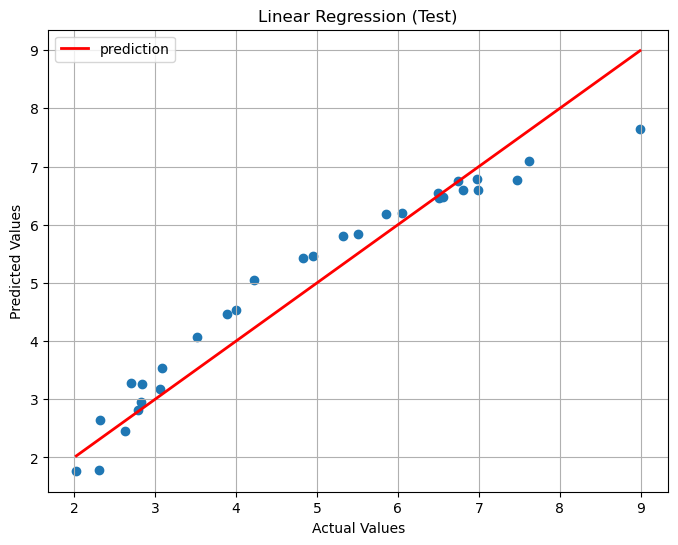

In [180]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, test_predictions)
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         color='red', linewidth=2, label='prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression (Test)')
plt.legend()
plt.grid(True)
plt.savefig("Linear Regression (Test).png", dpi=600, bbox_inches="tight")
plt.show()

In [181]:
# Bias Variance Decomposition 
from mlxtend.evaluate import bias_variance_decomp

bias_variance=[]

# === Make sure your data are numpy arrays ===
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    LinearRegression(),
    X_train, Y_train,
    X_test, Y_test,
    loss='mse',
    random_seed=23,
    num_rounds=200
)
bias_variance.append({
    'Model': 'Linear Regression',
    'Expected Loss': avg_expected_loss, 
    'Bias': avg_bias,
    'Variance': avg_var})

print("Bias Variance of Linear Regression")
print("Expected Loss:", avg_expected_loss)
print("Bias:", avg_bias)
print("Variance:", avg_var)

Bias Variance of Linear Regression
Expected Loss: 0.25042102585780646
Bias: 0.22633621812118734
Variance: 0.024084807736618644


In [182]:
# convert into a dataframe
bias_variance_df=pd.DataFrame(bias_variance)
bias_variance_df

,Model,Expected Loss,Bias,Variance
0,Linear Regression,0.250421,0.226336,0.024085


## Apply Polynomial Degree 2

In [184]:
polynomial_2 = PolynomialFeatures(degree=2)

In [185]:
X_train_poly_2 = polynomial_2.fit_transform(X_train)

X_test_poly_2 = polynomial_2.transform(X_test)

In [186]:
model = LinearRegression()

In [187]:
# Train the model

model.fit(X_train_poly_2, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [188]:
test_predictions_2 = model.predict(X_test_poly_2)
test_metrics_2 = {
    'Model': 'Polynomial Deg 2',
    "MSE": mean_squared_error(Y_test, test_predictions_2),
    "MAE": mean_absolute_error(Y_test, test_predictions_2),
    "R2": r2_score(Y_test, test_predictions_2),
    "MAPE": mean_absolute_percentage_error(Y_test, test_predictions_2)
}

print(test_metrics_2)

{'Model': 'Polynomial Deg 2', 'MSE': 0.02175406910548045, 'MAE': 0.12819877505319716, 'R2': 0.9941960633920779, 'MAPE': 0.030957371295513937}


In [189]:
# Append the result

results.append(test_metrics_2)

In [190]:
results

[{'Model': 'Linear Regression',
  'MSE': 0.2258508194476462,
  'MAE': 0.38246627104187486,
  'R2': 0.9397435103949736,
  'MAPE': 0.09045971164290627},
 {'Model': 'Polynomial Deg 2',
  'MSE': 0.02175406910548045,
  'MAE': 0.12819877505319716,
  'R2': 0.9941960633920779,
  'MAPE': 0.030957371295513937}]

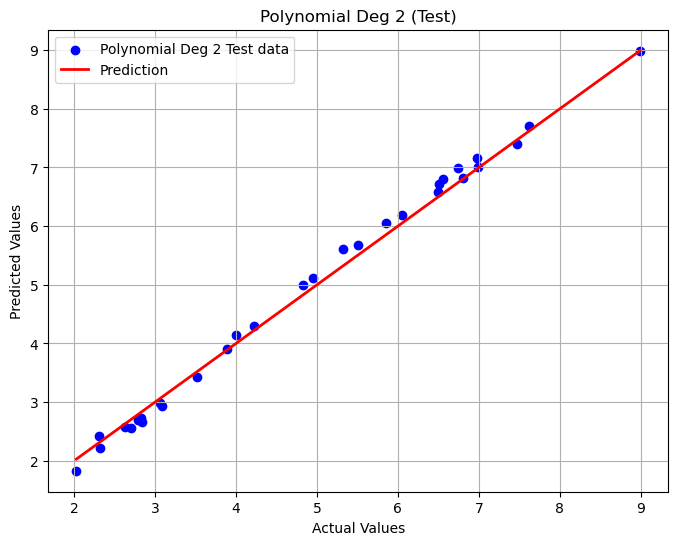

In [191]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, test_predictions_2, color='blue', label='Polynomial Deg 2 Test data')
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         color='red', linewidth=2, label='Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Deg 2 (Test)')
plt.legend()
plt.grid(True)
plt.savefig("Polynomial Deg2 (Test).png", dpi=600, bbox_inches="tight")
plt.show()

In [192]:
# Bias Variance Decomposition for Polynomial Deg 2

# === Make sure your data are numpy arrays ===
X_train_poly_2 = np.array(X_train_poly_2)
X_test_poly_2 = np.array(X_test_poly_2)
#Y_train_poly_2 = np.array(Y_train)
#Y_test_poly_2 = np.array(Y_test)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    LinearRegression(),
    X_train_poly_2, Y_train,
    X_test_poly_2, Y_test,
    loss='mse',
    random_seed=23,
    num_rounds=200
)
# Store result
bias_variance_df = pd.concat([bias_variance_df, pd.DataFrame([{
    "Model": "Polynomial Deg 2",
    "Expected Loss": avg_expected_loss,
    "Bias": avg_bias,
    "Variance": avg_var
}])], ignore_index=True)

print("Bias Variance of Polynomail Deg 2")
print("Expected Loss:", avg_expected_loss)
print("Bias:", avg_bias)
print("Variance:", avg_var)

Bias Variance of Polynomail Deg 2
Expected Loss: 0.027505076615524995
Bias: 0.01980522245207359
Variance: 0.007699854163451479


## Apply polynomial Deg 3

In [194]:
polynomial_3 = PolynomialFeatures(degree=3)

In [195]:
X_train_poly_3 = polynomial_3.fit_transform(X_train)

X_test_poly_3 = polynomial_3.transform(X_test)

In [196]:
# Train the model# Train the model

model.fit(X_train_poly_3, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [197]:
test_predictions_3 = model.predict(X_test_poly_3)
test_metrics_3 = {
    'Model': 'Polynomial Deg 3',
    "MSE": mean_squared_error(Y_test, test_predictions_3),
    "MAE": mean_absolute_error(Y_test, test_predictions_3),
    "R2": r2_score(Y_test, test_predictions_3),
    "MAPE": mean_absolute_percentage_error(Y_test, test_predictions_3)
}

print(test_metrics_3)

{'Model': 'Polynomial Deg 3', 'MSE': 0.00234413732356073, 'MAE': 0.03693476824092093, 'R2': 0.9993745894453013, 'MAPE': 0.007842325831818972}


In [198]:
# Append the result

results.append(test_metrics_3)

In [199]:
results

[{'Model': 'Linear Regression',
  'MSE': 0.2258508194476462,
  'MAE': 0.38246627104187486,
  'R2': 0.9397435103949736,
  'MAPE': 0.09045971164290627},
 {'Model': 'Polynomial Deg 2',
  'MSE': 0.02175406910548045,
  'MAE': 0.12819877505319716,
  'R2': 0.9941960633920779,
  'MAPE': 0.030957371295513937},
 {'Model': 'Polynomial Deg 3',
  'MSE': 0.00234413732356073,
  'MAE': 0.03693476824092093,
  'R2': 0.9993745894453013,
  'MAPE': 0.007842325831818972}]

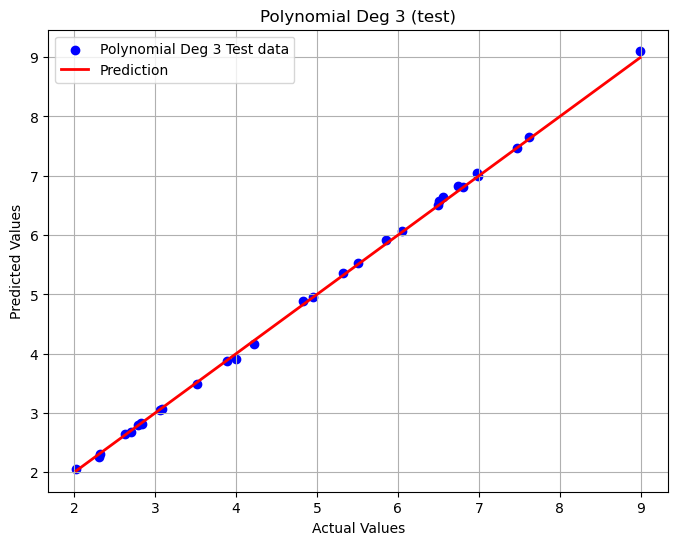

In [200]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, test_predictions_3, color='blue', label='Polynomial Deg 3 Test data')
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         color='red', linewidth=2, label='Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Deg 3 (test)')
plt.legend()
plt.grid(True)
plt.savefig("Polynomail Deg3 (Test).png", dpi=600, bbox_inches="tight")
plt.show()

In [201]:
# Bias Variance Decomposition for Polynomial Deg 3

# === Make sure your data are numpy arrays ===
X_train_poly_2 = np.array(X_train_poly_3)
X_test_poly_2 = np.array(X_test_poly_3)


avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    LinearRegression(),
    X_train_poly_3, Y_train,
    X_test_poly_3, Y_test,
    loss='mse',
    random_seed=23,
    num_rounds=200
)
# Store result
bias_variance_df = pd.concat([bias_variance_df, pd.DataFrame([{
    "Model": "Polynomial Deg 3",
    "Expected Loss": avg_expected_loss,
    "Bias": avg_bias,
    "Variance": avg_var
}])], ignore_index=True)

print("Bias Variance of Polynomail Deg 3")
print("Expected Loss:", avg_expected_loss)
print("Bias:", avg_bias)
print("Variance:", avg_var)




Bias Variance of Polynomail Deg 3
Expected Loss: 0.006284494729649242
Bias: 0.0021056086679003077
Variance: 0.004178886061748989


In [202]:
# Convert all results to a DataFrame
df_results = pd.DataFrame(results)

In [203]:
df_results

,Model,MSE,MAE,R2,MAPE
0,Linear Regression,0.225851,0.382466,0.939744,0.090460
1,Polynomial Deg 2,0.021754,0.128199,0.994196,0.030957
2,Polynomial Deg 3,0.002344,0.036935,0.999375,0.007842


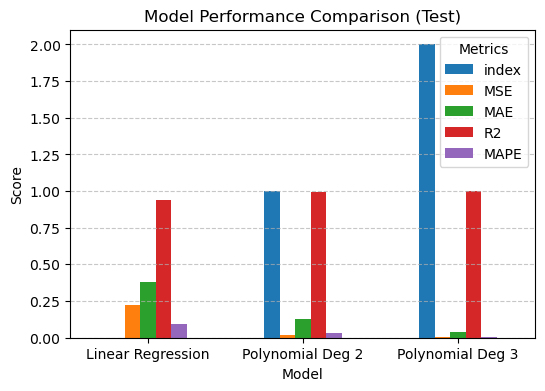

In [204]:
# Plot all metrics side by side
df_results.reset_index(inplace=True) # Reset the index to remove 0,1,2 and set name
df_results.set_index("Model", inplace=True)

df_results.plot(kind="bar", figsize=(6,4))
plt.title("Model Performance Comparison (Test)")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("Performance comparison (Test).png", dpi=600, bbox_inches="tight")
plt.show()

In [205]:
# Bias Variance Decomposition DataFrame

bias_variance_df

,Model,Expected Loss,Bias,Variance
0,Linear Regression,0.250421,0.226336,0.024085
1,Polynomial Deg 2,0.027505,0.019805,0.007700
2,Polynomial Deg 3,0.006284,0.002106,0.004179
